<Axes: xlabel='x', ylabel='y'>

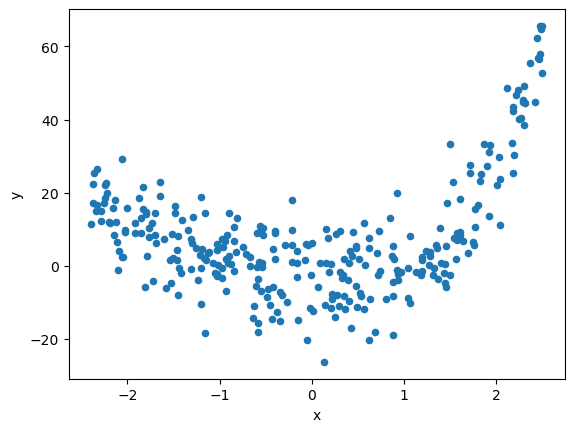

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import pickle
import numpy as np
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## Regression

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)


[7.55142922] [[3.8710475]]


### KNN

In [38]:
import sklearn.neighbors
knn_reg_3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg_3.fit(X_train, y_train)
knn_reg_5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg_5.fit(X_train, y_train)
print(knn_reg_3.predict([[0]]), knn_reg_5.predict([[0]]))

[[-2.80404429]] [[-2.88669846]]


### Polynomial Regression (wielomianowa)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features.fit_transform(X_train)
lin_reg_poly_2 = LinearRegression()
lin_reg_poly_2.fit(X_poly_2, y_train)
print("deg2: ", lin_reg_poly_2.intercept_, lin_reg_poly_2.coef_)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X_train)
lin_reg_poly_3 = LinearRegression()
lin_reg_poly_3.fit(X_poly_3, y_train)
print("deg3: ", lin_reg_poly_3.intercept_, lin_reg_poly_3.coef_)

poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly_4 = poly_features_4.fit_transform(X_train)
lin_reg_poly_4 = LinearRegression()
lin_reg_poly_4.fit(X_poly_4, y_train)
print("deg4: ", lin_reg_poly_4.intercept_, lin_reg_poly_4.coef_)

poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features_5.fit_transform(X_train)
lin_reg_poly_5 = LinearRegression()
lin_reg_poly_5.fit(X_poly_5, y_train)
print("deg5: ", lin_reg_poly_5.intercept_, lin_reg_poly_5.coef_)



deg2:  [-5.09464613] [[3.32165404 6.57612507]]
deg3:  [-4.82812611] [[-3.96912758  6.23145516  2.02640658]]
deg4:  [-2.64541779] [[-3.63000788  2.57558416  1.86485563  0.70183507]]
deg5:  [-2.64265666] [[-3.67923571  2.56872627  1.9026101   0.70362227 -0.00555189]]


### Plotting

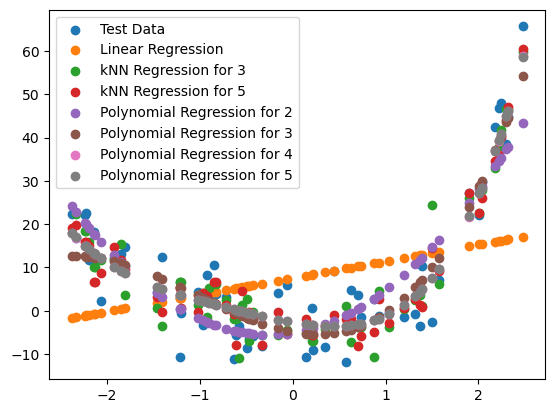

In [40]:
# Generate predictions for test data
y_pred_lin = lin_reg.predict(X_test)
y_pred_knn_3 = knn_reg_3.predict(X_test)
y_pred_knn_5 = knn_reg_5.predict(X_test)
y_pred_poly_2 = lin_reg_poly_2.predict(poly_features.transform(X_test))
y_pred_poly_3 = lin_reg_poly_3.predict(poly_features_3.transform(X_test))
y_pred_poly_4 = lin_reg_poly_4.predict(poly_features_4.transform(X_test))
y_pred_poly_5 = lin_reg_poly_5.predict(poly_features_5.transform(X_test))



# Plot the data and models
plt.scatter(X_test, y_test, label='Test Data')
plt.scatter(X_test, y_pred_lin, label='Linear Regression')
plt.scatter(X_test, y_pred_knn_3, label='kNN Regression for 3')
plt.scatter(X_test, y_pred_knn_5, label='kNN Regression for 5')
plt.scatter(X_test, y_pred_poly_2, label='Polynomial Regression for 2')
plt.scatter(X_test, y_pred_poly_3, label='Polynomial Regression for 3')
plt.scatter(X_test, y_pred_poly_4, label='Polynomial Regression for 4')
plt.scatter(X_test, y_pred_poly_5, label='Polynomial Regression for 5')

plt.legend()
plt.show()

[Points to collect here]
## 3. DataFrame with MSE

In [41]:
from sklearn.metrics import mean_squared_error
df_mse = pd.DataFrame({'train_mse': [mean_squared_error(y_train, lin_reg.predict(X_train)), 
                                     mean_squared_error(y_train, knn_reg_3.predict(X_train)), mean_squared_error(y_train, knn_reg_5.predict(X_train)), 
                                     mean_squared_error(y_train, lin_reg_poly_2.predict(poly_features.transform(X_train))), 
                                     mean_squared_error(y_train, lin_reg_poly_3.predict(poly_features_3.transform(X_train))), 
                                     mean_squared_error(y_train, lin_reg_poly_4.predict(poly_features_4.transform(X_train))), 
                                     mean_squared_error(y_train, lin_reg_poly_5.predict(poly_features_5.transform(X_train)))],
                       
                       'test_mse' : [mean_squared_error(y_test, lin_reg.predict(X_test)), 
                                     mean_squared_error(y_test, knn_reg_3.predict(X_test)), mean_squared_error(y_test, knn_reg_5.predict(X_test)), 
                                     mean_squared_error(y_test, lin_reg_poly_2.predict(poly_features.transform(X_test))), 
                                     mean_squared_error(y_test, lin_reg_poly_3.predict(poly_features_3.transform(X_test))), 
                                     mean_squared_error(y_test, lin_reg_poly_4.predict(poly_features_4.transform(X_test))), 
                                     mean_squared_error(y_test, lin_reg_poly_5.predict(poly_features_5.transform(X_test)))]},
                      
                        index=['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])
df_mse.to_pickle('mse.pkl')
df_mse

,train_mse,test_mse
lin_reg,235.425045,241.263537
knn_3_reg,48.278310,63.853928
knn_5_reg,58.507000,44.659347
poly_2_reg,95.696323,60.574928
poly_3_reg,74.184560,43.628805
poly_4_reg,70.023909,37.117774
poly_5_reg,70.023537,37.145055


## 4. List of touples with objects

In [42]:
list_of_models = [(lin_reg, None), (knn_reg_3, None), (knn_reg_5, None), (lin_reg_poly_2, poly_features), (lin_reg_poly_3, poly_features_3), (lin_reg_poly_4, poly_features_4), (lin_reg_poly_5, poly_features_5)]

# save to pickle
with open('reg.pkl', 'wb') as f:
    pickle.dump(list_of_models, f)
